# Support Vector Machines

#### 1) SVM

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
def plot_dataset(X, y, axes = [-1.5, 2.5, -1, 1.5]):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs") # Plots a point with label 0 are plotted as blue squares ('bs')
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^") # Plots a point with label 1 are plotted as green triangles ('g')
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize = 20) # Labels the x-axis as x1 with a font size of 20.
    plt.ylabel(r"$x_2$", fontsize = 20, rotation = 0) # Labels the y-axis as x2 with a font size of 20 and a rotation of 0 degrees.
    
# X: 2D numpy array where each row represents an instance of a dataset with two features.
#  y: 1D numpy array of labels for the instances in X. It has two possible classes, represented as 0 and 1.
#   axes: A list of four float values that specifies the limits for the x and y axis of the plot. 
#   By default, it is set to [-1.5, 2.5, -1, 1.5].    
    
def plot_predictions(clf, axes = [-1.5, 2.5, -1, 1.5]):
    x0s = np.linspace(axes[0], axes[1], 100) # Creates a grid of 100x100 points spanning the range specified by axes
    x1s = np.linspace(axes[2], axes[3], 100) # Creates a grid of 100x100 points spanning the range specified by axes
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape) # Predicted class for each point is stored
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap = plt.cm.brg, alpha = 0.2) # Plot the predicted class regions as filled contours with alpha of 0.2 and color map plt.cm.brg
    plt.contourf(x0, x1, y_decision, cmap = plt.cm.brg, alpha = 0.1) # Plot the decision boundary as filled contours with alpha of 0.1 and color map plt.cm.brg

# clf: An instance of a classifier class with methods predict and decision_function.
#  axes: A list of four float values that specifies the limits for the x and y axis of the plot. 
#  By default, it is set to [-1.5, 2.5, -1, 1.5].

In [3]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 100, noise = 0.15, random_state = 42)
#make_moons: A function from scikit-learn that generates a two-dimensional non-linearly separable dataset consisting of two interleaving half circles. The dataset is often used to test the performance of classification algorithms on non-linear datasets.
# n_samples: An integer that specifies the number of samples to generate. In this case, it is set to 100.
#  noise: A float that specifies the standard deviation of the Gaussian noise added to the dataset. In this case, it is set to 0.15.
#   random_state: An integer or a random number generator object that controls the randomness of the dataset generation. In this case, it is set to 42 to ensure reproducibility of the dataset.

#X: A 2D numpy array of shape (n_samples, 2) containing the features of the generated dataset. Each row represents a sample with two features.
# y: A 1D numpy array of shape (n_samples,) containing the class labels of the samples. 
# The labels are either 0 or 1, corresponding to the two half circles.
#  Code generates a non-linearly separable dataset of 100 samples consisting of two interleaving half circles with some Gaussian noise.

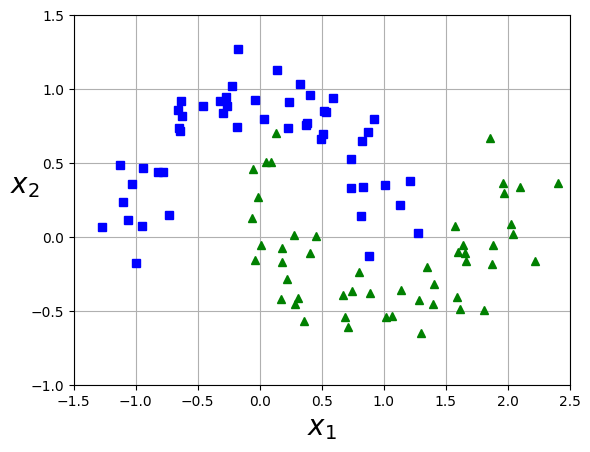

In [4]:
plot_dataset(X, y)

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_lin = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", LinearSVC(C = 1, loss = 'hinge'))
])

# Pipeline consists of two steps (treating as a single object):
#  1. StandardScaler: This step applies the standard scaling technique to the input features. 
#  Standard scaling scales each feature to have zero mean and unit variance, which is a common preprocessing step for many machine learning algorithms.
#  2. LinearSVC: This step creates a linear SVM classifier with regularization parameter C equal to 1 and loss function 'hinge'. 
#  The regularization parameter C controls the trade-off between maximizing the margin and minimizing the classification error. 
#  The loss function 'hinge' is commonly used for linear SVMs and encourages the classifier to produce large margins between the two classes.


svm_lin.fit(X, y) # Fits it to the input dataset X and target vector y

C:\Users\emssc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', LinearSVC(C=1, loss='hinge'))])

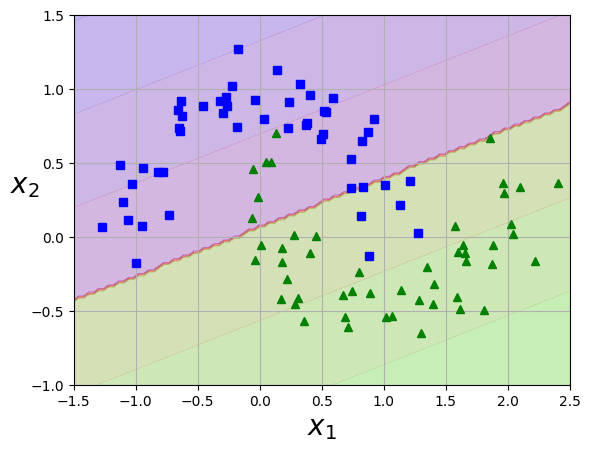

In [6]:
plot_dataset(X, y) # A scatter plot of the 2D dataset X and its corresponding class labels y using the plot_dataset function.
plot_predictions(svm_lin)
# Overlays the decision boundary of the trained linear SVM classifier svm_lin on top of the scatter plot using the plot_predictions function. 
#  This function takes the trained SVM classifier svm_lin as input and generates a contour plot that shows the regions of the feature space that correspond to different predicted class labels. 
#   The blue region corresponds to predicted class label 0 and the red region corresponds to predicted class label 1. 
#    The contour plot also shows the decision boundary between the two classes as a solid line.

Although linear SVM classifiers are efficient and work surprisingly well in many cases, you can see that this dataset is not even close to being linearly separable. One approach to handling nonlinear datasets is to add more features, such as polynomial features; in some cases this can result in a linearly separable dataset.

In [7]:
from sklearn.preprocessing import PolynomialFeatures

svm_poly = Pipeline([
    ("poly_feat", PolynomialFeatures(degree = 3)), # Transform observations (rows) explictly
    ("scaler", StandardScaler()),
    ("svm", LinearSVC(C = 1, loss = 'hinge'))
])
# (x1, x2) -> (1, x1, x2, x1^2, x1x2, x2^2, x1^3, x1^2x2, x1x2^2, x2^3)
# C has two interpretations:
# i. C is inverse of regularization strength. 
#  High C, low regularization -> flexible model
#  Low C, high regulations -> simple model
# ii. C is inverse of budget.
#  High C, low budget -> we accept only a few missclassfied points
#  Low C, high budget -> we accept many missclassified points

# Pipeline consists of two steps (treating as a single object):
#  1. StandardScaler: This step applies the standard scaling technique to the input features. 
#  Standard scaling scales each feature to have zero mean and unit variance, which is a common preprocessing step for many machine learning algorithms.
#  2. LinearSVC: This step creates a linear SVM classifier with regularization parameter C equal to 1 and loss function 'hinge'. 
#  The regularization parameter C controls the trade-off between maximizing the margin and minimizing the classification error. 
#  The loss function 'hinge' is commonly used for linear SVMs and encourages the classifier to produce large margins between the two classes.

svm_poly.fit(X, y) # Fits it to the input dataset X and target vector y

C:\Users\emssc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('poly_feat', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm', LinearSVC(C=1, loss='hinge'))])

In [8]:
svm_poly["poly_feat"].n_output_features_
# svm_poly["poly_feat"]: A pipeline step that applies polynomial features to the input data. 
#  n_output_features_: Attribute returns the number of output features after applying the polynomial transformation.

10

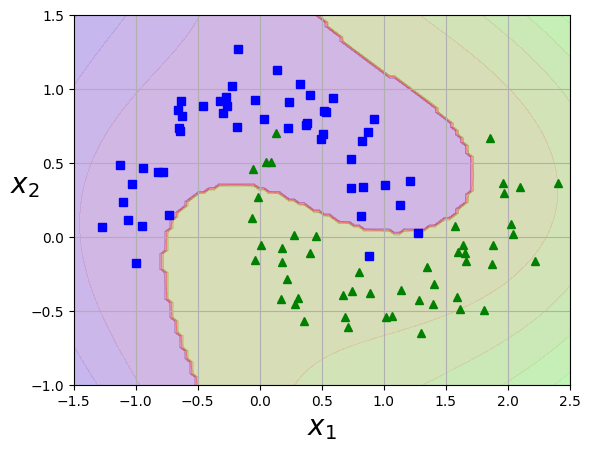

In [9]:
plot_dataset(X, y) # A scatter plot of the 2D dataset X and its corresponding class labels y using the plot_dataset function.
plot_predictions(svm_poly)
# Overlays the decision boundary of the trained linear SVM classifier svm_lin on top of the scatter plot using the plot_predictions function. 
#  This function takes the trained SVM classifier svm_lin as input and generates a contour plot that shows the regions of the feature space that correspond to different predicted class labels. 
#   The blue region corresponds to predicted class label 0 and the red region corresponds to predicted class label 1. 
#    The contour plot also shows the decision boundary between the two classes as a solid line.

The gamma parameter in RBFSampler controls the width of the RBF kernel used to transform the input data into the feature space. Specifically, it determines the spread of the Gaussian "bump" centered at each data point. A large value of gamma leads to a narrow and tall Gaussian bump, which results in a more complex feature representation with more emphasis on local structures in the data. On the other hand, a small value of gamma leads to a wider and flatter Gaussian bump, which results in a smoother and more global feature representation.

In practice, gamma is a hyperparameter that needs to be tuned to achieve good classification performance. A common approach is to perform a grid search over a range of gamma values to find the one that gives the best performance on a validation set. The optimal value of gamma depends on the specific dataset and should be chosen based on empirical evaluation.

In [10]:
from sklearn.kernel_approximation import RBFSampler

svm_rbf = Pipeline([
    ("rbf_feat", RBFSampler(gamma = 1, n_components=100)), # transform observations (rows) explictly
    ("scaler", StandardScaler()),
    ("svm", LinearSVC(C = 1, loss = "hinge", max_iter=int(1e5)))
])


# Pipeline consists of two steps (treating as a single object):
#  1. StandardScaler: This step applies the standard scaling technique to the input features. 
#  Standard scaling scales each feature to have zero mean and unit variance, which is a common preprocessing step for many machine learning algorithms.
#  2. LinearSVC: This step creates a linear SVM classifier with regularization parameter C equal to 1 and loss function 'hinge'. 
#  The regularization parameter C controls the trade-off between maximizing the margin and minimizing the classification error. 
#  The loss function 'hinge' is commonly used for linear SVMs and encourages the classifier to produce large margins between the two classes.
#  3. rbf_feat: This step approximates the RBF kernel by randomly projecting the input data into a high-dimensional feature space. 
#  The gamma parameter determines the spread of the Gaussian "bump" centered at each data point. 
#  The n_components parameter specifies the number of random Fourier features used to approximate the RBF kernel. 
#  In this case, gamma is set to 1 and n_components is set to 100.

# RBF: gamma controls how "local" the predictions are. You can think of gamma as inverse of k in KNN. 
    
svm_rbf.fit(X, y) # Fits it to the input dataset X and target vector y

C:\Users\emssc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('rbf_feat', RBFSampler(gamma=1)), ('scaler', StandardScaler()),
                ('svm', LinearSVC(C=1, loss='hinge', max_iter=100000))])

In [11]:
svm_rbf["rbf_feat"].n_components # Determines the number of random Fourier features used to approximate the RBF kernel.

100

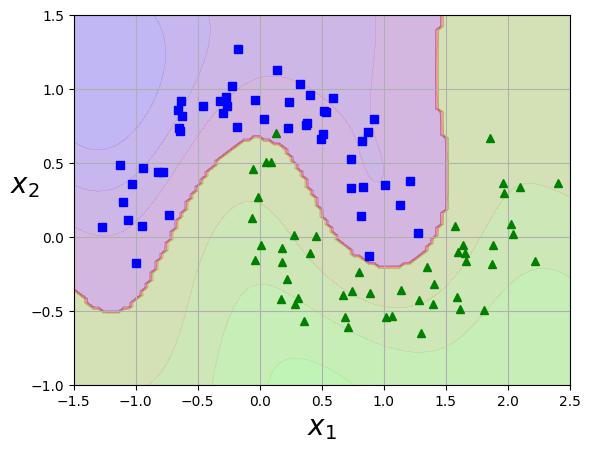

In [12]:
plot_dataset(X, y) # A scatter plot of the 2D dataset X and its corresponding class labels y using the plot_dataset function.
plot_predictions(svm_rbf)
# Overlays the decision boundary of the trained linear SVM classifier svm_lin on top of the scatter plot using the plot_predictions function. 
#  This function takes the trained SVM classifier svm_lin as input and generates a contour plot that shows the regions of the feature space that correspond to different predicted class labels. 
#   The blue region corresponds to predicted class label 0 and the red region corresponds to predicted class label 1. 
#    The contour plot also shows the decision boundary between the two classes as a solid line.

So far, we tried to solve the problem of non linear decision boundary by performing explicit feature transformations (i.e., adding polynomial features or radial basis function). Another way to do this, is by using the _kernel trick_. 
The kernel trick makes it possible to get the same result as if you performed feature transformations, without actually having to add new features.

__Remark__: Using the kernel trick is advisable only for small to medium-sized datasets.
It scales well with the number of features, especially with sparse features (i.e., when each instance has few nonzero features).
When the number of observations gets large (e.g., hundreds of thousands of instances), using the kernel trick is _very_ slow. In such a case, one can still use the approach above for a more reasonable fitting time, i.e., first tranforming features and then applying linear SVM.

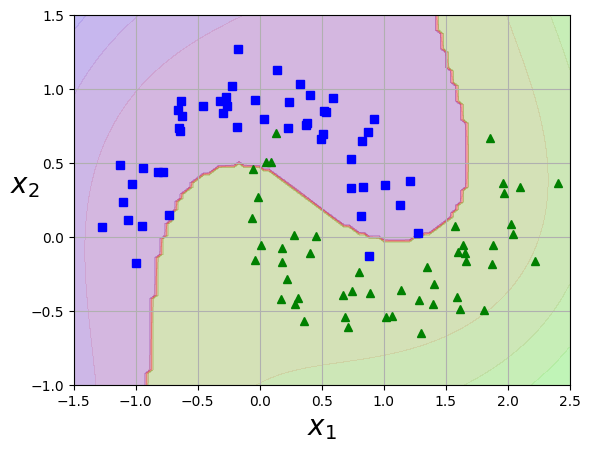

In [13]:
from sklearn.svm import SVC

svm_poly_kern = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel = 'poly', degree = 3, coef0 = 1, C = 1)) # Rransform observations (rows) implicitly
])

# Pipeline consists of two steps (treating as a single object):
#  1. StandardScaler: This step applies the standard scaling technique to the input features. 
#  Standard scaling scales each feature to have zero mean and unit variance, which is a common preprocessing step for many machine learning algorithms.
#  2. svm: This step applies the support vector machine algorithm to train a classifier using the polynomial kernel. 
#  The kernel parameter is set to 'poly' to specify that we want to use the polynomial kernel. 
#  The degree parameter sets the degree of the polynomial kernel. In this case, it is set to 3. 
#  The coef0 parameter sets the independent term in the kernel function. In this case, it is set to 1. 
#  The C parameter sets the regularization strength. 
#  A smaller value of C leads to a wider margin but more margin violations, while a larger value of C leads to a narrower margin but fewer margin violations. In this case, it is set to 1.

svm_poly_kern.fit(X, y) # Fits it to the input dataset X and target vector y

plot_dataset(X, y) # A scatter plot of the 2D dataset X and its corresponding class labels y using the plot_dataset function.
plot_predictions(svm_poly_kern) 
# Overlays the decision boundary of the trained linear SVM classifier svm_lin on top of the scatter plot using the plot_predictions function. 
#  This function takes the trained SVM classifier svm_lin as input and generates a contour plot that shows the regions of the feature space that correspond to different predicted class labels. 
#   The blue region corresponds to predicted class label 0 and the red region corresponds to predicted class label 1. 
#    The contour plot also shows the decision boundary between the two classes as a solid line.

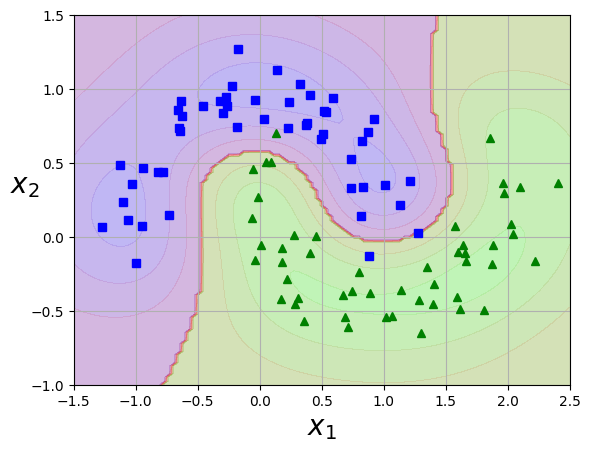

In [14]:
svm_rbf_kern = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel = 'rbf', gamma = 1, C= 1)) # Transform observations (rows) implicitly
])

# Pipeline consists of two steps (treating as a single object):
#  1. StandardScaler: This step applies the standard scaling technique to the input features. 
#  Standard scaling scales each feature to have zero mean and unit variance, which is a common preprocessing step for many machine learning algorithms.
#  2. svm: This step applies the support vector machine algorithm to train a classifier using the RBF kernel. 
#  The kernel parameter is set to 'rbf' to specify that we want to use the RBF kernel. 
#  The gamma parameter sets the width of the Gaussian kernel. In this case, it is set to 1. 
#  The C parameter sets the regularization strength. A smaller value of C leads to a wider margin but more margin violations, while a larger value of C leads to a narrower margin but fewer margin violations. In this case, it is set to 1.

svm_rbf_kern.fit(X, y) # Fits it to the input dataset X and target vector y

plot_dataset(X, y) # A scatter plot of the 2D dataset X and its corresponding class labels y using the plot_dataset function.
plot_predictions(svm_rbf_kern) 
# Overlays the decision boundary of the trained linear SVM classifier svm_lin on top of the scatter plot using the plot_predictions function. 
#  This function takes the trained SVM classifier svm_lin as input and generates a contour plot that shows the regions of the feature space that correspond to different predicted class labels. 
#   The blue region corresponds to predicted class label 0 and the red region corresponds to predicted class label 1. 
#    The contour plot also shows the decision boundary between the two classes as a solid line.

In [15]:
# Create folds
from sklearn.model_selection import KFold, GridSearchCV

folds = KFold(n_splits = 10, random_state = 1234, shuffle = True)
# This helps to prevent bias due to any inherent order in the data.

In [16]:
# No kernel trick (explicitly transforming observations (rows), i.e., add new features (columns))
# Polynomial

poly_params = {"poly_feat__degree": np.arange(2, 10), # Range of degrees being searched is from 2 to 9
               "svm__C": [1, 10]} # Searched are 1 and 10

svm_poly = Pipeline([
    ("poly_feat", PolynomialFeatures()),
    ("scaler", StandardScaler()),
    ("svm", LinearSVC(loss = "hinge", max_iter = int(1e5)))
])

# PolynomialFeatures transformer to generate polynomial features of different degrees
# StandardScaler to scale the input data
# LinearSVC estimator to train a linear SVM classifier with the hinge loss

svm_poly_cv = GridSearchCV(estimator = svm_poly,
                           param_grid = poly_params,
                           scoring = "accuracy",
                           cv = folds)

# estimator: Specifies the algorithm or model to be tuned
#  param_grid: A dictionary that contains the hyperparameters to be tuned and the possible values for each hyperparameter
#   scoring: parameter is set to "accuracy", which means that the performance of the model will be evaluated based on its accuracy score.
#    cv: The dataset is split into 'folds' equal parts, and the model is trained and evaluated 10 times, each time using a different fold as the test set for cross-validation

svm_poly_cv.fit(X, y) # Fits it to the input dataset X and target vector y


# RBFSampler
rbf_params = {"rbf_feat__gamma": [0.1, 1, 5, 10, 100], # Range of gamma values being searched 
              "svm__C": [1, 10]} # Searched are 1 and 10

svm_rbf = Pipeline([
    ("rbf_feat", RBFSampler()),
    ("scaler", StandardScaler()),
    ("svm", LinearSVC(loss = "hinge", max_iter = int(1e5)))
])

# RBFSampler transformer to generate random Fourier features using the RBF kernel
# StandardScaler to scale the input data
# LinearSVC estimator to train a linear SVM classifier with the hinge loss

svm_rbf_cv = GridSearchCV(estimator = svm_rbf,
                           param_grid = rbf_params,
                           scoring = "accuracy",
                           cv = folds)

# estimator: Specifies the algorithm or model to be tuned
#  param_grid: A dictionary that contains the hyperparameters to be tuned and the possible values for each hyperparameter
#   scoring: parameter is set to "accuracy", which means that the performance of the model will be evaluated based on its accuracy score.
#    cv: The dataset is split into 'folds' equal parts, and the model is trained and evaluated 10 times, each time using a different fold as the test set for cross-validation

svm_rbf_cv.fit(X, y) # Fits it to the input dataset X and target vector y

# Kernel trick (implicitly transforming obs (rows), i.e., add new features (columns))
# Polynomial
poly_kern_params = {"svm__degree": np.arange(2, 10), # A range of degrees from 2 to 9 (inclusive)
                    "svm__coef0": [1, 5, 10],
                    "svm__C": [1, 10]} # Searched are 1 and 10

svm_poly_kern = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel = "poly"))
])

# StandardScaler to scale the input data
# Refer to earlier pipeline

svm_poly_kern_cv = GridSearchCV(estimator = svm_poly_kern,
                           param_grid = poly_kern_params,
                           scoring = "accuracy",
                           cv = folds)

# estimator: Specifies the algorithm or model to be tuned
#  param_grid: A dictionary that contains the hyperparameters to be tuned and the possible values for each hyperparameter
#   scoring: parameter is set to "accuracy", which means that the performance of the model will be evaluated based on its accuracy score.
#    cv: The dataset is split into 'folds' equal parts, and the model is trained and evaluated 10 times, each time using a different fold as the test set for cross-validation

svm_poly_kern_cv.fit(X, y) # Fits it to the input dataset X and target vector y

# RBF
rbf_kern_params = {"svm__gamma": [0.1, 1, 5, 10, 100], # Range of gamma values being searched 
                   "svm__C": [1, 10]} # Searched are 1 and 10

svm_rbf_kern = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel = "rbf"))
])

# StandardScaler to scale the input data
# Refer to earlier pipeline

svm_rbf_kern_cv = GridSearchCV(estimator = svm_rbf_kern,
                           param_grid = rbf_kern_params,
                           scoring = "accuracy",
                           cv = folds)

# estimator: Specifies the algorithm or model to be tuned
#  param_grid: A dictionary that contains the hyperparameters to be tuned and the possible values for each hyperparameter
#   scoring: parameter is set to "accuracy", which means that the performance of the model will be evaluated based on its accuracy score.
#    cv: The dataset is split into 'folds' equal parts, and the model is trained and evaluated 10 times, each time using a different fold as the test set for cross-validation

svm_rbf_kern_cv.fit(X, y) # Fits it to the input dataset X and target vector y


C:\Users\emssc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\emssc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\emssc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\User

GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [1, 10], 'svm__gamma': [0.1, 1, 5, 10, 100]},
             scoring='accuracy')

In [17]:
#  prints the best hyperparameters found by the GridSearchCV algorithm

#pd.DataFrame(svm_rbf_kern_cv.cv_results_)
print("Best parameters")
print("Polynomial features:", svm_poly_cv.best_params_)
print("RBF sampler:", svm_rbf_cv.best_params_)
print("Polynomial kernel:", svm_poly_kern_cv.best_params_)
print("RBF kernel:", svm_rbf_kern_cv.best_params_)

Best parameters
Polynomial features: {'poly_feat__degree': 3, 'svm__C': 10}
RBF sampler: {'rbf_feat__gamma': 1, 'svm__C': 1}
Polynomial kernel: {'svm__C': 1, 'svm__coef0': 5, 'svm__degree': 4}
RBF kernel: {'svm__C': 10, 'svm__gamma': 1}


In [18]:
# Generate test data
X_test, y_test = make_moons(n_samples = 1000, noise = 0.15, random_state = 9191)
#make_moons: A function from scikit-learn that generates a two-dimensional non-linearly separable dataset consisting of two interleaving half circles. The dataset is often used to test the performance of classification algorithms on non-linear datasets.
# n_samples: An integer that specifies the number of samples to generate. In this case, it is set to 100.
#  noise: A float that specifies the standard deviation of the Gaussian noise added to the dataset. In this case, it is set to 0.15.
#   random_state: An integer or a random number generator object that controls the randomness of the dataset generation. In this case, it is set to 42 to ensure reproducibility of the dataset.

# Evaluate models
from sklearn.metrics import accuracy_score

# Calculates the accuracy score of the best estimator found by the grid search (svm_poly_cv.best_estimator_) on the test set (X_test, y_test). 
#  The accuracy_score function is used to calculate the accuracy of the predictions made by the model on the test set.

print("Test Accuracies")
print("Polynomial features:", accuracy_score(y_test, svm_poly_cv.best_estimator_.predict(X_test)))
print("RBF sampler:", accuracy_score(y_test, svm_rbf_cv.best_estimator_.predict(X_test)))
print("Polynomial kernel:", accuracy_score(y_test, svm_poly_kern_cv.best_estimator_.predict(X_test)))
print("RBF kernel:", accuracy_score(y_test, svm_rbf_kern_cv.best_estimator_.predict(X_test)))

Test Accuracies
Polynomial features: 0.988
RBF sampler: 0.989
Polynomial kernel: 0.99
RBF kernel: 0.987


### 2) Boosting
Boosting refers to any Ensemble method that can combine several weak learners into a strong learner. The general idea of most boosting methods is to train predictors sequentially, each trying to correct its predecessor.


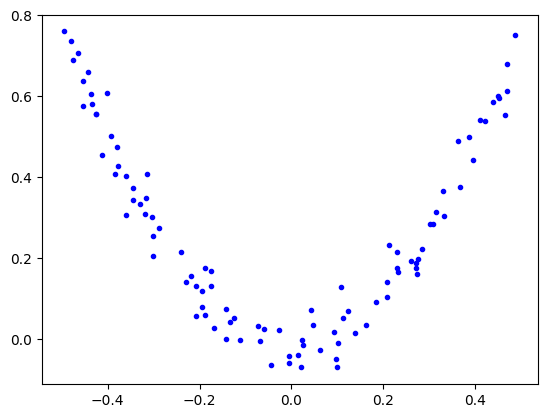

In [19]:
np.random.seed(42) # Sets the seed of the random number generator, ensuring that the generated dataset is reproducible.
X = np.random.rand(100, 1) - 0.5 # Generates a 2D array X with 100 rows and 1 column, containing random values between 0 and 1 subtracted by 0.5, effectively generating random values between -0.5 and 0.5. This creates the input feature X.
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.randn(100) # Generates a 1D array y containing the corresponding target variable values based on a quadratic equation with some random noise. This creates the output target y.

# plot data
plt.plot(X[:, 0], y, "b.");
# Plots the dataset using a blue dot for each data point. 
# The X[:, 0] expression selects the first column of X to use as the x-axis values, and y is used for the y-axis values.

Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor. This method tries to fit the new predictor to the residual errors made by the previous predictor.
Let’s go through a simple regression example, using Decision Trees as the base predictors. This is called Gradient Tree Boosting, or Gradient Boosted Regression Trees (GBRT). 

In [20]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth = 2) # Creates an instance of the DecisionTreeRegressor class with a maximum depth of 2, limiting the depth of the tree to 2 levels. This helps to prevent overfitting and improve the generalization performance of the model.
tree_reg1.fit(X, y) # Trains the decision tree regression model using the input features X and target variable y.

DecisionTreeRegressor(max_depth=2)

In [21]:
tree_reg1.get_n_leaves() # Returns the number of leaves in the decision tree regression model tree_reg1 trained in the previous code snippet.

4

In [22]:
y2 = y - tree_reg1.predict(X) # Subtracts the predictions made by the decision tree regression model tree_reg1 from the true target variable values y, producing a new target variable array y2 containing the residual errors.

tree_reg2 = DecisionTreeRegressor(max_depth = 2) # Creates an instance of the DecisionTreeRegressor class with a maximum depth of 2, limiting the depth of the tree to 2 levels. This helps to prevent overfitting and improve the generalization performance of the model.
tree_reg2.fit(X, y2) # Trains the decision tree regression model using the input features X and target variable y.

DecisionTreeRegressor(max_depth=2)

In [23]:
y3 = y2 - tree_reg2.predict(X) # Applies a second decision tree regression model tree_reg2 to capture the patterns in the residual errors left after the first model tree_reg1 was applied. 
# i.e. y3 = y - tree_reg1.predict(X) - tree_reg2.predict(X)

tree_reg3 = DecisionTreeRegressor(max_depth = 2) # Creates an instance of the DecisionTreeRegressor class with a maximum depth of 2, limiting the depth of the tree to 2 levels. This helps to prevent overfitting and improve the generalization performance of the model.
tree_reg3.fit(X, y3) # Trains the decision tree regression model using the input features X and target variable y.

DecisionTreeRegressor(max_depth=2)

In [24]:
# The code y_pred = tree_reg1.predict(X_test) + tree_reg2.predict(X_test) + tree_reg3.predict(X_test) applies an ensemble of three decision tree regression models to make predictions for a new test dataset X_test. 
# This technique is known as "gradient boosting" and can be used to improve the accuracy of machine learning models by combining multiple weaker models to produce a stronger ensemble model.

np.random.seed(1234) # Sets the seed for the NumPy random number generator to the integer.
X_test = np.random.rand(100, 1) - 0.5 # Generates a NumPy array X_test of shape (100, 1) with random numbers uniformly distributed between -0.5 and 0.5.

y_pred = tree_reg1.predict(X_test) + tree_reg2.predict(X_test) + tree_reg3.predict(X_test)

In [25]:
def plot_predictions2(regressors, X, y, axes, style = "r-", label = None, data_style = "b.", data_label = None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label = data_label)
    plt.plot(x1, y_pred, style, linewidth = 2, label = label)
    if label or data_label:
        plt.legend(loc = "upper center", fontsize = 16)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize = 14)
    plt.ylabel(r"$y$", fontsize = 14, rotation = 0)
    
# The function first generates a new array x1 of 500 evenly spaced values between xmin and xmax. 
#  It then uses a list comprehension to generate an array y_pred of predicted target variable values for each value in x1, by summing up the predicted target variable values for each model in regressors.

# The function then plots the original data points using the style and label specified by data_style and data_label. 
#  It also plots the ensemble predictions using the style and label specified by style and label. 
#   Finally, the function adds x-axis and y-axis labels, sets the plot limits using the values in axes, and adds a legend if either label or data_label are provided.

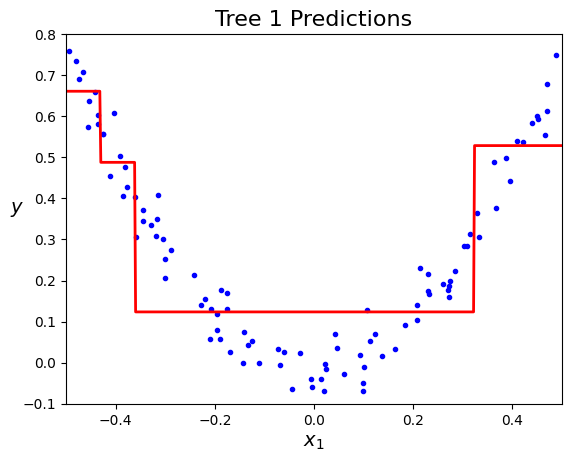

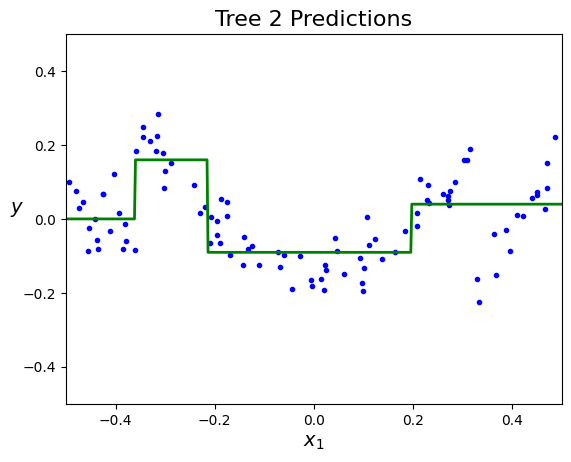

In [26]:
# Plot first predictor
plot_predictions2([tree_reg1], X, y, axes = [-0.5, 0.5, -0.1, 0.8])
plt.title("Tree 1 Predictions", fontsize = 16)
plt.show()
# Shows the predictions of the first tree tree_reg1 alone, using the original data X and y. 
# The plot displays the predicted values of the target variable on the y-axis, and the input feature values on the x-axis. 

# Plot second predictor alone on the residuals
plot_predictions2([tree_reg2], X, y2, axes = [-0.5, 0.5, -0.5, 0.5], style="g-");
plt.title("Tree 2 Predictions", fontsize = 16)
plt.show()
# Shows the predictions of the second tree tree_reg2 alone, using the residuals from the predictions of the first tree y2 and the original input features X. 
# The plot displays the predicted values of the target variable on the y-axis, and the input feature values on the x-axis. 

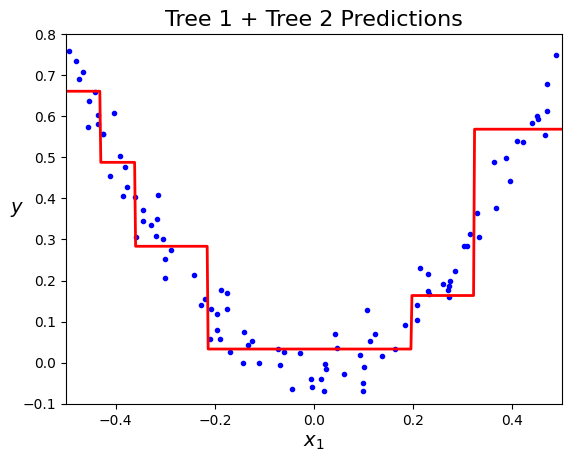

In [27]:
# Plot the first and second predictor together
plot_predictions2([tree_reg1, tree_reg2], X, y, axes = [-0.5, 0.5, -0.1, 0.8])
plt.title("Tree 1 + Tree 2 Predictions", fontsize = 16)
plt.show()

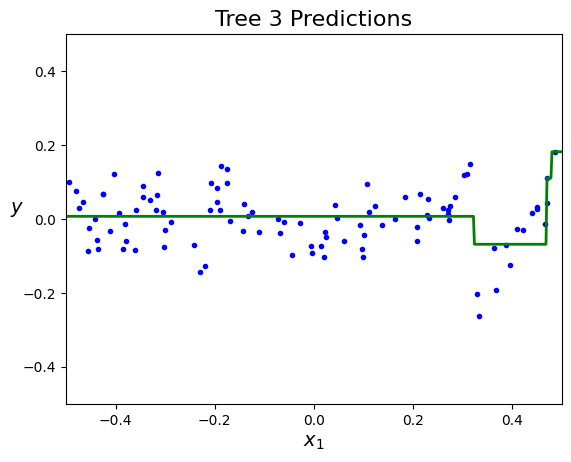

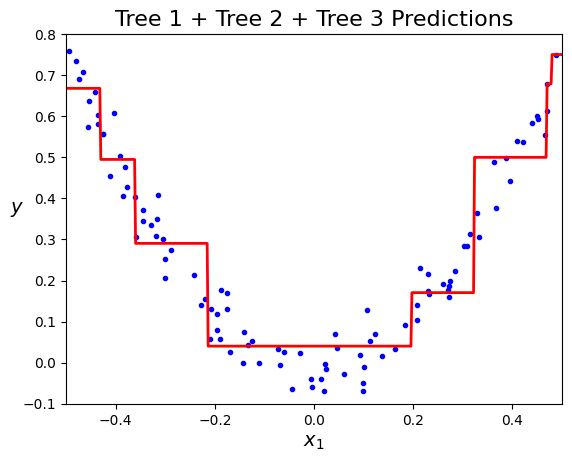

In [28]:
# Plot the third predictor alone on the residuals
plot_predictions2([tree_reg3], X, y3, axes = [-0.5, 0.5, -0.5, 0.5], style="g-");
plt.title("Tree 3 Predictions", fontsize = 16)
plt.show()

# Plot all three prectors together
plot_predictions2([tree_reg1, tree_reg2, tree_reg3], X, y, axes = [-0.5, 0.5, -0.1, 0.8])
plt.title("Tree 1 + Tree 2 + Tree 3 Predictions", fontsize=16)
plt.show()

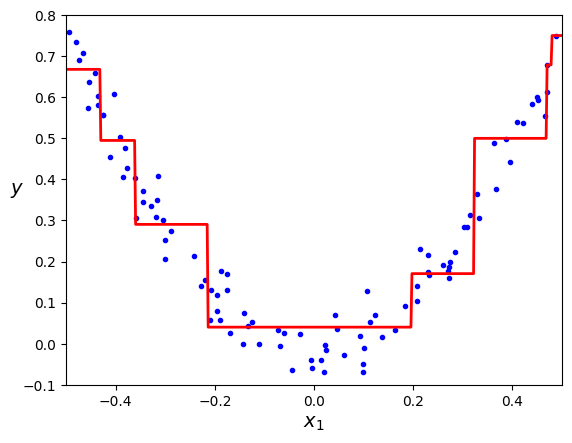

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators = 3, learning_rate = 1.0, max_depth = 2)
# n_estimators parameter:Controls the number of trees in the ensemble
# learning_rate parameter: Controls the contribution of each tree
# max_depth parameter: Controls the maximum depth of each tree

gbr.fit(X, y) # Fits it to the training data X and y

plot_predictions2([gbr], X, y, axes = [-0.5, 0.5, -0.1, 0.8]) # The plot displays the predicted values of the target variable on the y-axis, and the input feature values on the x-axis.

The `learning_rate` hyperparameter scales the contribution of each tree. If you set it to a low value, such as 0.01 or 0.001, you will need more trees in the ensemble to fit the training set, but the predictions will usually generalize better. This is a regularization technique called shrinkage.

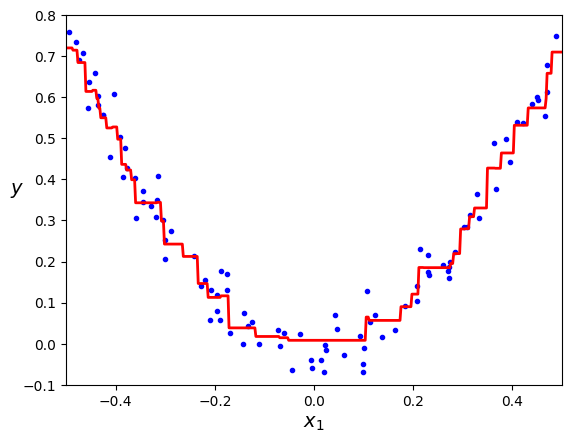

In [30]:
gbr = GradientBoostingRegressor(n_estimators = 500, learning_rate = 0.01, max_depth = 2)
# n_estimators parameter:Controls the number of trees in the ensemble
# learning_rate parameter: Controls the contribution of each tree
# max_depth parameter: Controls the maximum depth of each tree

gbr.fit(X, y) # Fits it to the training data X and y

plot_predictions2([gbr], X, y, axes = [-0.5, 0.5, -0.1, 0.8]) # The plot displays the predicted values of the target variable on the y-axis, and the input feature values on the x-axis.

In [31]:
heart = pd.read_csv("Heart_ISL.csv",index_col = 0).dropna().reset_index(drop = True)
heart = heart.astype({'ChestPain':'category', 'Thal':'category', 'AHD':'category'})
print("Original dataset shape:", heart.shape)
#heart.head()
X = pd.get_dummies(heart.drop("AHD", axis = 1), drop_first = True) # Remove the response from the other predictor variables
y = heart["AHD"] # Only keep the response variable

# Split into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
# X and y are the input features (predictors) and target (response) variable separately
#  test_size parameter is the porprotion of the data allocated in the test set
#   random_state parameter initializes the random number generator to produce the same results each run

Original dataset shape: (297, 14)


In [32]:
# Fit boosting
from sklearn.ensemble import GradientBoostingClassifier

gbct = GradientBoostingClassifier(max_depth = 2, n_estimators = 1000, learning_rate = 0.01)
# n_estimators parameter:Controls the number of trees in the ensemble
# learning_rate parameter: Controls the contribution of each tree
# max_depth parameter: Controls the maximum depth of each tree

gbct.fit(X_train, y_train) # Fits the gbct model to the training data X_train and y_train
gbct.score(X_test, y_test) # Calculates the classification accuracy score of the model on the test data X_test and y_test

0.85

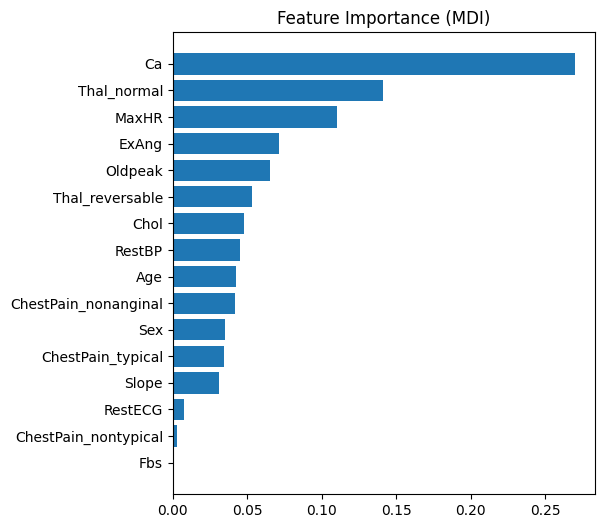

In [33]:
feature_importance = gbct.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align = 'center')
plt.yticks(pos, np.array(list(X))[sorted_idx])
plt.title('Feature Importance (MDI)')
plt.show()

# feature_importance: Retrieves the importance scores of each feature in the gbct model, where higher scores indicate greater importance in making accurate predictions.
#  sorted_idx: Sorts the indices of feature_importance in ascending order, such that the indices of the least important features come first.
#   pos: Creates an array of positions for plotting the horizontal bars in the bar chart.
#    fig: Creates a new figure object with the specified size.
#     plt.subplot: Adds a new subplot to the current figure with 1 row, 2 columns, and the first position.
#      plt.barh: Plots horizontal bars for each feature importance score, using the sorted index positions for the features and the importance scores themselves. The align argument centers each bar horizontally on its position.
#       plt.yticks: Assigns the feature labels to the y-axis ticks for each bar in the plot, in the same order as the sorted importance scores. The list(X) converts the feature names to a list, and the np.array and sorted_idx are used to index into the features in the correct order.